# Лабораторная работа 1 
### Вибраторные антенны
тест гит

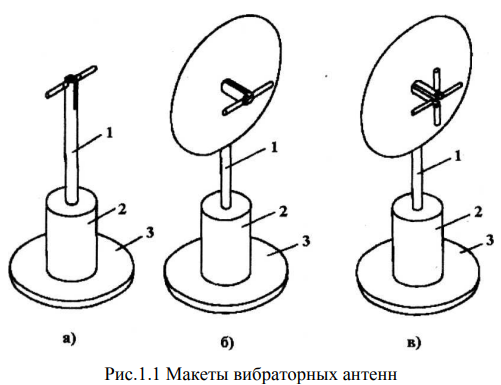

Антенна, изображенная на _рис. 1.1,а, - симметричный вибратор,_ 
питаемый с помощью коаксиальной линии и четвертьволнового щелевого
симметрирующего устройства. 

Ненормированная ДН тонкой
симметричной вибраторной антенны в любой меридиональной плоскости
(т.е. в горизонтальной плоскости в условиях установки и по отношению к
рис. 1.1 ,а) определена выражением

### $f(\theta) = \frac{(cos(\frac{\pi}{\lambda}l*cos(\theta))-cos(\frac{\pi}{\lambda}*l))}{sin(\theta)}$ - поле в плоскости вектора Е

$\frac{2\pi}{\lambda}$ - волновое число k

Где $l$ - длина плеча вибратора; $θ$ - угол наблюдения в сферической
системе координат, отсчитываемый от оси вибратора и
изменяющийся в пределах $0-180°$. 

    _Поле вибраторной антенны в плоскости вектора Н(т.е. в плоскости, перпендикулярной оси вибратора) прилюбых длинах плеча не зависит от угла ϕ, т.е. представляет собой окружность._

---

При  бесконечных  размерах  плоскости  ее  влияние  может  быть  учтено 
введением зеркального изображения с током встречного направления. 

Таким  образом,  расчет  диаграммы  направленности  исследуемой  антенны 
приближенно  может  быть  выполнен  по  формулам  для  решетки  из  двух 
противофазных излучающих элементов. 

Формулы диаграмм 
направленности в плоскости вектора Н и плоскости вектора Е, 
соответственно, имеют вид

### $f_H(\theta) = sin(k*h*cos(\theta))$

### $f_E(\theta) = \frac{cos(k*l*sin(\theta)) - cos(k*l)}{cos(\theta)} * sin(k*h*cos(\theta)) $

k - волновое число

$k = \frac{2\pi}{\lambda}$ 

Где  h  -  высота  подвеса  вибратора  над  металлическим  экраном;  l  -  длина 
плеча  вибратора;  θ  -  угол  наблюдения  в  сферической  системе  координат, 
отсчитываемый  от  оси  решетки  (от  перпендикуляра  к  экрану)  в  одну  или 
другую сторону в пределах θ = (0-90)°

---

На  рис.  1.1  ,в  изображена  турникетная  вибраторная  антенна.  Токи  в 
вибраторах сдвинуты по фазе на 90°, а их амплитуды одинаковы.

_В результате в направлении перпендикуляра к плоскости расположения вибраторов  создается  поле  круговой  поляризации._

---

### Расчётное задание

1.   #### Рассчитать  диаграмму  направленности  симметричного  вибратора  в 
Е-плоскости.  Вибратор  считать  тонким.  Длина  плеча  задается  для  каждой 
бригады в табл. 1.1. 

Для примеру возьму значение _5 Бригады_ $\frac{l}{\lambda} = 0.56$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

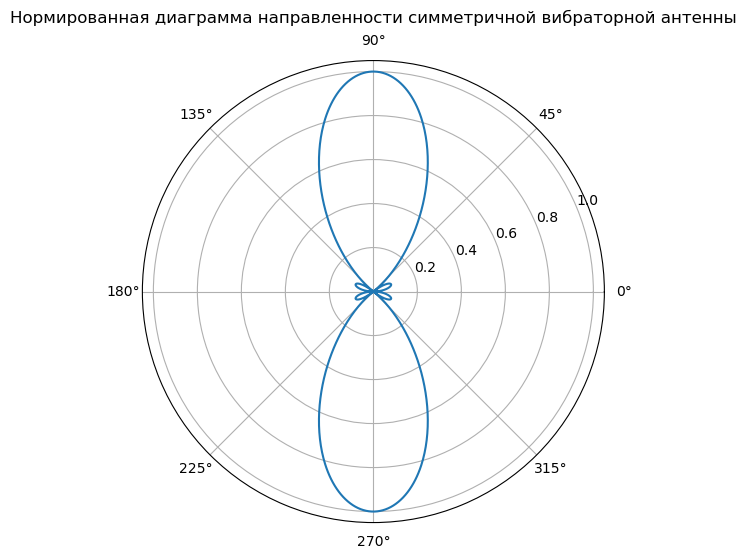

In [5]:

# Задаем параметры
l = 0.56  # длина вибратора
k = 2*np.pi  # волновое число для длины волны 1

# Угол в радианах
theta = np.linspace(0, 2 * np.pi, 1000)

# Функция диаграммы направленности с обработкой деления на 0
def f_theta(theta):
    result = np.divide(np.cos(k * l * np.cos(theta)) - np.cos(k * l), np.sin(theta), where=np.sin(theta)!=0)
    #np.devide обрабатывает исключения чтобы исключить значения, где синус зануляется
    return np.abs(result)

# Вычисление диаграммы направленности
f_values = f_theta(theta)/f_theta(np.pi/2)

# Построение диаграммы направленности в полярной системе координат
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, f_values)
ax.set_title("Нормированная диаграмма направленности симметричной вибраторной антенны", va='bottom')
plt.show()

2. #### Рассчитать диаграмму направленности полуволнового вибратора, 
расположенного на высоте h параллельно бесконечному металлическому 
экрану.

### Расчет провести для Е и H плоскости 

Нормированные диаграммы строятся в полярной системе координат в том же, как и в предыдущем пункте, масштабе 
сплошной  линией.  
_Направление  θ  =  0°  на  бланке  диаграммы  ориентируется вертикально вверх._

$\frac{h}{\lambda} = 0.73$

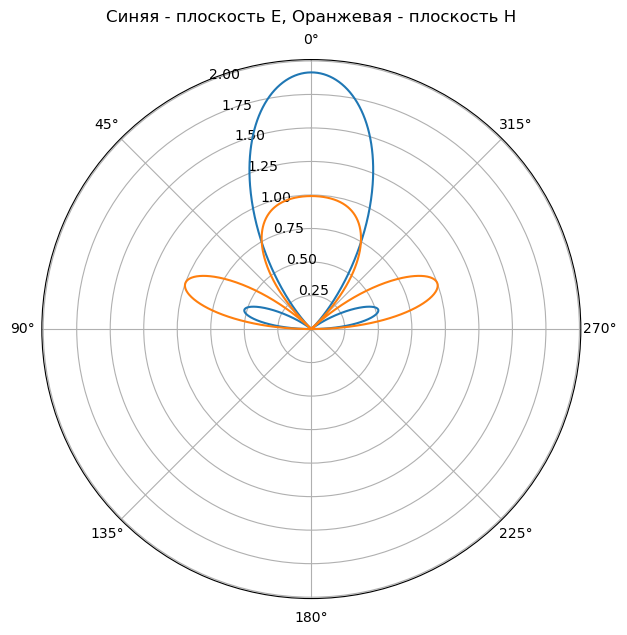

In [6]:
# Задаем параметры
h = 0.73 # высота вибратора
k = 2*np.pi  # волновое число для длины волны 1

# Угол в радианах
theta = np.linspace(np.pi/2,(3*np.pi)/2, 1000)

def fE_theta(theta): # плоскость Е
    result = np.divide((np.cos(k * l * np.sin(theta)) - np.cos(k * l))*np.sin(k*h*np.cos(theta))/(np.cos(theta)), np.cos(theta), where=np.cos(theta)!=0)
    #np.devide обрабатывает исключения чтобы исключить значения, где синус зануляется
    return np.abs(result)

def fH_theta(theta): # плоскость H
    result = np.sin(k*h*np.cos(theta))
    return np.abs(result)

# Вычисление диаграммы направленности
fE_values = fE_theta(theta)
fH_values = fH_theta(theta)

y = np.array([fE_values, fH_values])

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_title("Синяя - плоскость Е, Оранжевая - плоскость Н", va='bottom')
plt.plot(theta + np.pi, y[0])

plt.plot(theta + np.pi, y[1])

plt.show()

В качестве обязательных пунктов в программу включается измерение рассчитанных характеристик. Наилучшая программа утверждается преподавателем для выполнения в лаборатории. 

### Пояснение по коду

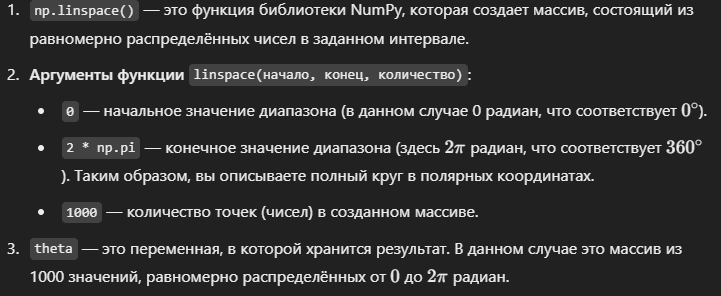

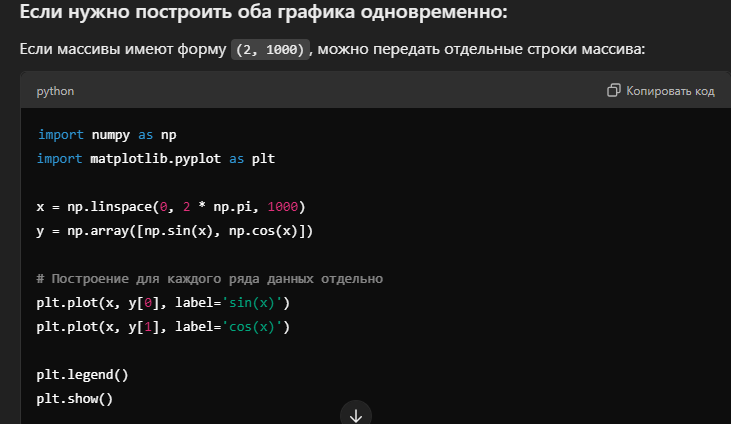

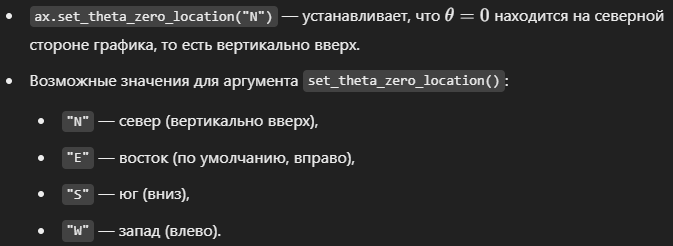

---
### Выполнение работы


### Как занести экспериментальные данные и добавить их на теоретические графики

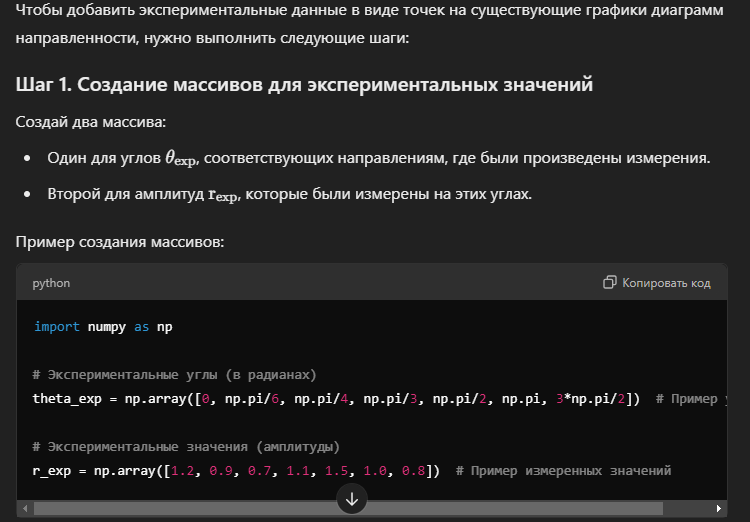

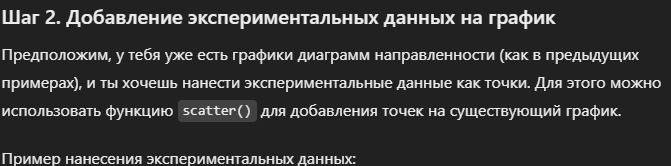

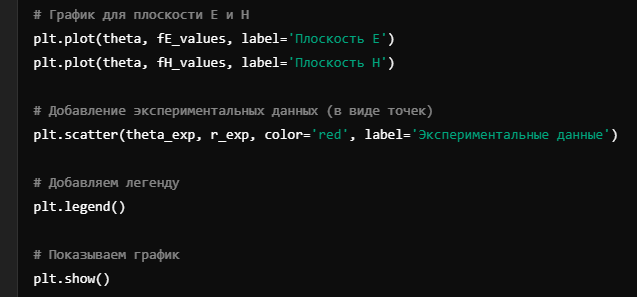



---

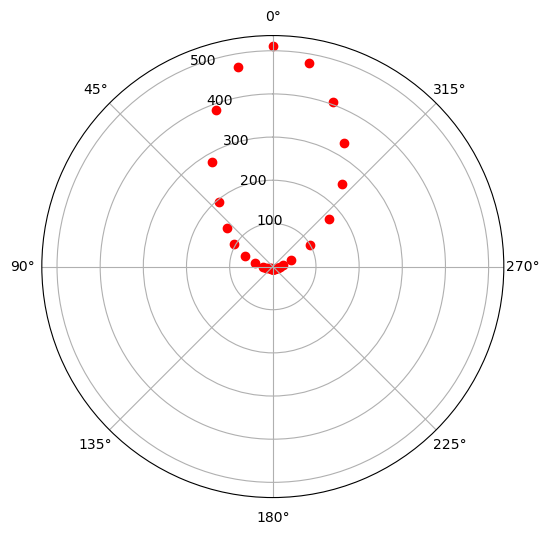

In [33]:
phi_exp = np.array([-180,-170 ,-160, -150 ,-140,-130 ,-120,-110 ,-100,-90 ,-80,-70 ,-60,-50 ,-40,-30 ,-20,-10 ,0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
r_exp = np.array([6, 6.5, 6.5, 6, 6, 8, 8, 9, 13, 16, 24, 46, 100, 170, 250, 330, 405, 480, 510, 470, 385, 280, 195, 140, 105, 69, 42, 22, 15, 11, 7, 6, 6, 6, 5.5, 6, 6  ])   # значения в миливольтах
# h = 1.2 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter((phi_exp*np.pi)/180, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

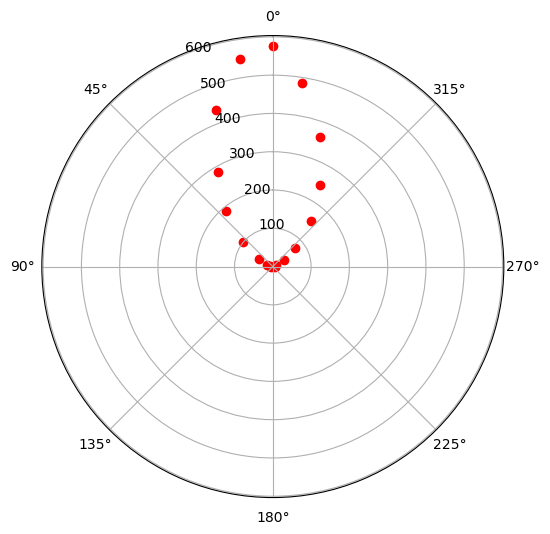

In [40]:
theta_exp = np.array([-np.pi/2, -1.396, -1.222, -1.047, -0.8727, -0.6981, -0.5236, -0.3491, -0.1574, 0, 0.1574, 0.3491, 0.5236, 0.6981, 0.8727, 1.047, 1.222, 1.396, np.pi/2   ]) # углы ( шаг 10 градусов )
r_exp = np.array([5.5, 5.5, 8.5, 34, 74, 155, 245, 360, 485, 575, 550, 435, 285, 190, 100, 41, 15, 6.5, 6  ])   # значения в миливольтах
#h = 1.2 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter(theta_exp, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

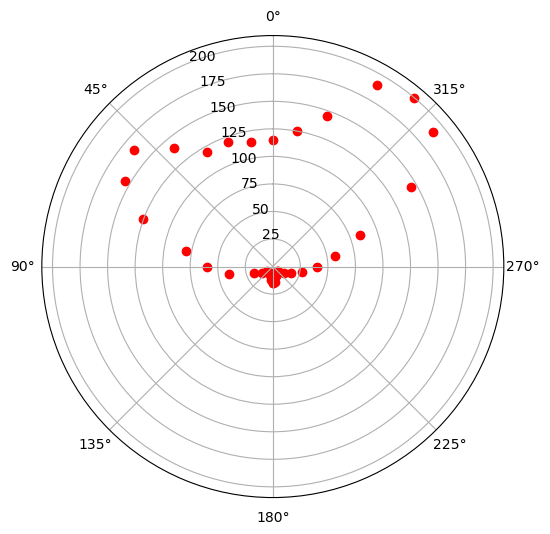

In [41]:
phi_exp = np.array([-180,-170 ,-160, -150 ,-140,-130 ,-120,-110 ,-100,-90 ,-80,-70 ,-60,-50 ,-40,-30 ,-20,-10 ,0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
r_exp = np.array([15, 14, 9, 6, 5.5, 6.5, 11.5, 17.5, 26.5, 40.5, 57, 84.5, 145, 190, 200, 190, 145, 125, 115, 115, 120, 120, 140, 165, 155, 125, 80, 60, 40, 18, 11.5, 6.5, 6, 6.5, 8, 12, 15])   # значения в миливольтах
# h = 4.5 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter((phi_exp*np.pi)/180, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

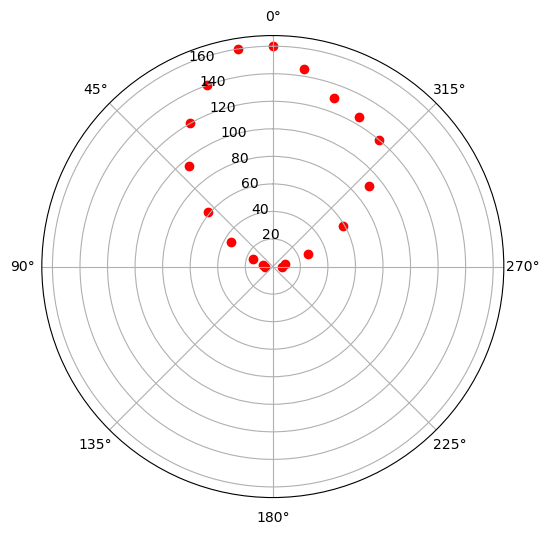

In [43]:
theta_exp = np.array([-np.pi/2, -1.396, -1.222, -1.047, -0.8727, -0.6981, -0.5236, -0.3491, -0.1574, 0, 0.1574, 0.3491, 0.5236, 0.6981, 0.8727, 1.047, 1.222, 1.396, np.pi/2   ]) # углы ( шаг 10 градусов )
r_exp = np.array([7, 9, 27.5, 59, 91, 120, 125, 130, 145, 160, 160, 140, 120, 95, 61.5, 35, 15.5, 7, 5.5])   # значения в миливольтах
#h = 4.5 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter(theta_exp, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

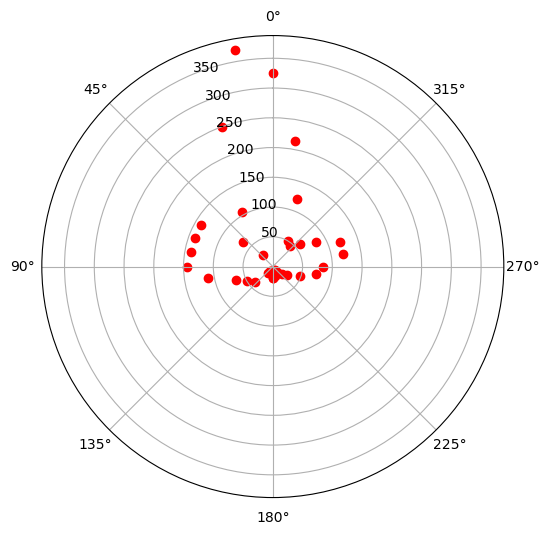

In [44]:
phi_exp = np.array([-180,-170 ,-160, -150 ,-140,-130 ,-120,-110 ,-100,-90 ,-80,-70 ,-60,-50 ,-40,-30 ,-20,-10 ,0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
r_exp = np.array([20, 16.5, 7, 6, 12, 19.5, 27.5, 48.5, 73.5, 85, 120, 120, 84, 59, 45, 50.5, 120, 215, 325, 370, 250, 105, 26, 64.5, 140, 140, 140, 145, 110, 65, 50, 40, 13.5, 8, 7.5, 11.5, 20])   # значения в миливольтах
# h = 7.3 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter((phi_exp*np.pi)/180, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

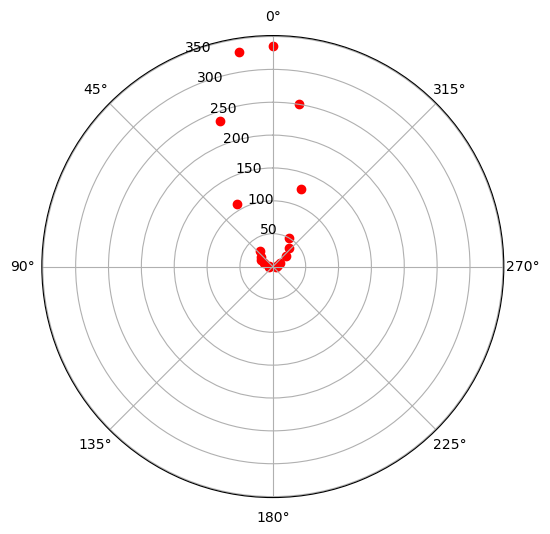

In [45]:
theta_exp = np.array([-np.pi/2, -1.396, -1.222, -1.047, -0.8727, -0.6981, -0.5236, -0.3491, -0.1574, 0, 0.1574, 0.3491, 0.5236, 0.6981, 0.8727, 1.047, 1.222, 1.396, np.pi/2   ]) # углы ( шаг 10 градусов )
r_exp = np.array([5.5, 6, 8, 12, 26, 37.5, 50.5, 125, 250, 335, 330, 235, 110, 31.5, 23.5, 21, 14, 6.5, 5.5])   # значения в миливольтах
#h = 7.3 sm
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter(theta_exp, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

# Исследование турникета 

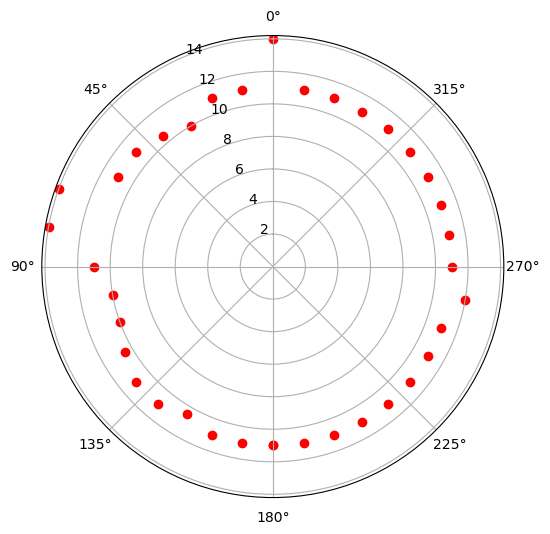

In [46]:
phi_exp = np.array([-180,-170 ,-160, -150 ,-140,-130 ,-120,-110 ,-100,-90 ,-80,-70 ,-60,-50 ,-40,-30 ,-20,-10 ,0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
r_exp = np.array([11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 10, 10.5, 11, 11, 14, 14, 11, 10, 10, 10.5, 11, 11, 10.5, 11, 11, 11])   # значения в миливольтах
# Турникет!
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter((phi_exp*np.pi)/180, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

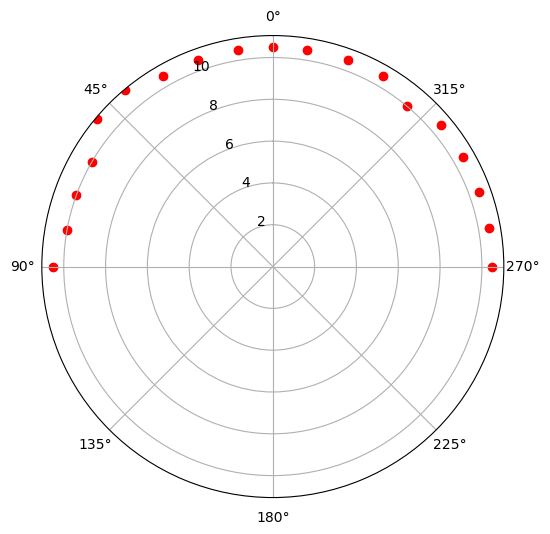

In [50]:
theta_exp = np.array([-np.pi/2, -1.396, -1.222, -1.047, -0.8727, -0.6981, -0.5236, -0.3491, -0.1574, 0, 0.1574, 0.3491, 0.5236, 0.6981, 0.8727, 1.047, 1.222, 1.396, np.pi/2   ]) # углы ( шаг 10 градусов )
r_exp = np.array([10.5, 10.5, 10.5, 10.5, 10.5, 10, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 11, 11, 10, 10, 10, 10.5])   # значения в миливольтах
#Турникет!
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

exp1 = plt.scatter(theta_exp, r_exp, color = 'red', label = 'Эксперимент')

plt.show()

Поворотное устройство - стоят две катушки больших, вращающихся одна в другой. Получается типо трансформатор.
Антенна устанавливается

На каждом стенде есть набор из сменных наконечников, нужно вкручивать аккуратно.

Нужно исследовать:
1. 4 диаграммы направленности 36 измерений 
2. вибратор над металлическим экраном 
3. на турникете ничего не регулировать и снять только ДН
4. нужно снять поляризационные характеристики (у турникета круговая в идеале)
5. Поляризационна характеристика- зависимости напряжени от поляризации антенны. Ее нужно поворачивать и снимать напряжение.

Длину плеч менять нельзя, она половина длины волны.
3 любых варианта, установить нужную поляризацию
длины вибратора совпадают с вариантами в домашней подготовке 



### 1-й эксперимент 

$lвибратора = 9.5 см$


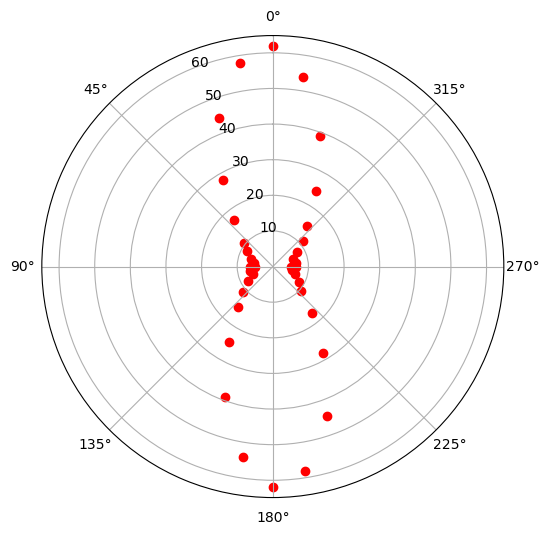

In [35]:
theta_exp = np.array([-np.pi/2, -1.396, -1.222, -1.047, -0.8727, -0.6981, -0.5236, -0.3491, -0.1574, 0, 0.1574, 0.3491, 0.5236, 0.6981, 0.8727, 1.047, 1.222, 1.396, np.pi/2   ]) # углы ( шаг 10 градусов )
r_exp = np.array([6.5, 6.5,  6, 8, 11, 15, 24.5, 39, 54, 62, 58, 44.5, 28, 17, 10.5, 8.5, 6.5, 5.5, 5])   # значения в миливольтах

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
exp1 = plt.scatter(theta_exp, r_exp, color = 'red', label = 'Эксперимент')
exp2 = plt.scatter(theta_exp + np.pi, r_exp, color = 'red', label = 'Эксперимент')

plt.show()